## Observations and Insights 

1. According to the anaylsis, the 2 drugs that are most effective are Capomulin and Ramicane. These treatments are able to shrink the tumors more effectivly than other treatments. 

2. Ketapril seemed to be the worst performing drug and performed very similarly to the placebo

3. There seems to be a strong positive correlcation between tumor vol and mouse weight

4. A god addtional graph would be make a line plot with multipe lines to compare average tumor volume and timepoint for all drugs


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")
combined_mouse_df.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
# Checking the number of mice in the DataFrame.
mouse_count = (combined_mouse_df["Mouse ID"]).nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_mouse_df.loc[combined_mouse_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids
clean_study_data_complete = combined_mouse_df[combined_mouse_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#g989

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dup_mouse_df = clean_study_data_complete.drop_duplicates()
drop_dup_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_2 = (drop_dup_mouse_df["Mouse ID"]).nunique()
mouse_count_2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_stats=drop_dup_mouse_df[['Drug Regimen', 'Tumor Volume (mm3)']]
drug_stats
tumor_stats= drug_stats.groupby(['Drug Regimen']).mean().round(3)
tumor_stats = tumor_stats.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
tumor_stats['Median Tumor Volume'] = drug_stats.groupby(["Drug Regimen"]).median().round(3)
tumor_stats['Variance Tumor Volume'] = drug_stats.groupby(["Drug Regimen"]).var().round(3)
tumor_stats['Std. Dev. Tumor Volume'] = drug_stats.groupby(["Drug Regimen"]).std().round(3)
tumor_stats['SEM Tumor Volume'] = drug_stats.groupby(["Drug Regimen"]).sem().round(3)
tumor_stats
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_stats.describe()
#drug_stats.agg(['Mean tumor volume','Median Tumor Volume', 'Variance Tumor Volume', 'Std. Dev. Tumor Volume', 'SEM Tumor Volume'])
# This method produces everything in a single groupby function.

,Tumor Volume (mm3)
count,1880.000000
mean,50.435293
std,8.914197
min,22.050126
25%,45.000000
50%,48.933454
75%,56.324075
max,78.567014


## Bar Plots

Text(0.5, 1.0, 'Number of Mice Per Treatment')

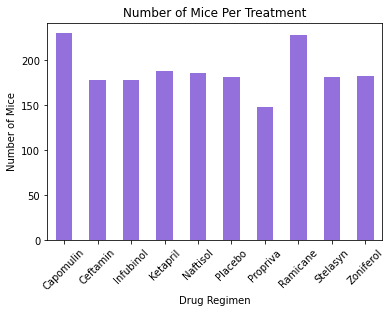

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_per_treatment = drop_dup_mouse_df.groupby("Drug Regimen")["Timepoint"].count()
mice_per_treatment.plot(kind="bar", color= 'mediumpurple')
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Number of Mice")
plt.title("Number of Mice Per Treatment")


Text(0.5, 1.0, 'Number of Mice Per Treatment')

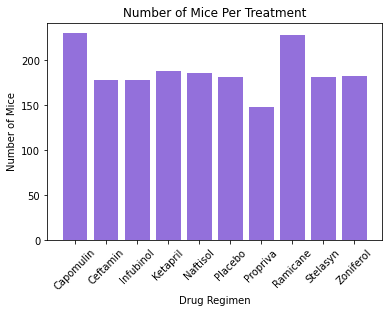

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
drug_regimens_list=mice_per_treatment.index.tolist()
x_axis=drug_regimens_list
y_axis=mice_per_treatment
plt.bar(x_axis, y_axis, color='mediumpurple', align="center")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Number of Mice")
plt.title("Number of Mice Per Treatment")

## Pie Plots

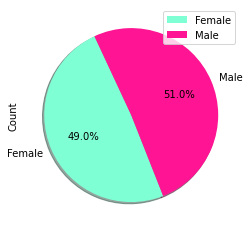

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender=drop_dup_mouse_df.groupby('Sex').count()
gender_group= mouse_gender[["Mouse ID"]]
gender_group =gender_group.rename(columns={'Mouse ID': 'Count'})
gender_group
colors=['aquamarine','deeppink']
gender_group.plot.pie(y="Count", colors=colors, startangle=115, shadow=True, autopct="%1.1f%%")
plt.show()

<ipython-input-12-92049aa33f3c>:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(gender_group, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=115)


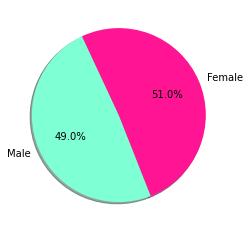

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels= ["Male","Female"]
gender_count= gender_group
colors=['aquamarine','deeppink']
plt.pie(gender_group, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=115)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
best_treatments=drop_dup_mouse_df[drop_dup_mouse_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_treatments_2=best_treatments.groupby('Mouse ID')['Timepoint'].max()
best_treatments_3=best_treatments_2.to_frame()
best_treatments_final=pd.merge(best_treatments_3, drop_dup_mouse_df, on=['Mouse ID', 'Timepoint'], how="left")
best_treatments_final

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
#Quartiles

#Capomulin
Capomulin_df=best_treatments_final.loc[best_treatments_final["Drug Regimen"]=="Capomulin"]
Capomulin_tumor_vol= Capomulin_df['Tumor Volume (mm3)']
quartiles = Capomulin_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print('Capomulin')
print(f"The lower quartile of tumor vol is: {lowerq}")
print(f"The upper quartile of tummor vol is: {upperq}")
print(f"The interquartile range of tumor vol is: {iqr}")
print(f"The the median of tumor vol is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Ramicane
Ramicane_df=best_treatments_final.loc[best_treatments_final["Drug Regimen"]=="Ramicane"]
Ramicane_tumor_vol= Ramicane_df['Tumor Volume (mm3)']
quartiles = Ramicane_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print('Ramicane')
print(f"The lower quartile of tumor vol is: {lowerq}")
print(f"The upper quartile of tummor vol is: {upperq}")
print(f"The interquartile range of tumor vol is: {iqr}")
print(f"The the median of tumor vol is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Infubinol
Infubinol_df=best_treatments_final.loc[best_treatments_final["Drug Regimen"]=="Infubinol"]
Infubinol_tumor_vol= Infubinol_df['Tumor Volume (mm3)']
quartiles =Infubinol_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print('Infubinol')
print(f"The lower quartile of tumor vol is: {lowerq}")
print(f"The upper quartile of tummor vol is: {upperq}")
print(f"The interquartile range of tumor vol is: {iqr}")
print(f"The the median of tumor vol is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Ceftamin
Ceftamin_df=best_treatments_final.loc[best_treatments_final["Drug Regimen"]=="Infubinol"]
Ceftamin_tumor_vol= Ceftamin_df['Tumor Volume (mm3)']
quartiles =Ceftamin_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print('Ceftamin')
print(f"The lower quartile of tumor vol is: {lowerq}")
print(f"The upper quartile of tummor vol is: {upperq}")
print(f"The interquartile range of tumor vol is: {iqr}")
print(f"The the median of tumor vol is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Capomulin
The lower quartile of tumor vol is: 32.37735684
The upper quartile of tummor vol is: 40.1592203
The interquartile range of tumor vol is: 7.781863460000004
The the median of tumor vol is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ramicane
The lower quartile of tumor vol is: 31.56046955
The upper quartile of tummor vol is: 40.65900627
The interquartile range of tumor vol is: 9.098536719999998
The the median of tumor vol is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Infubinol
The lower quartile of tumor vol is: 54.04860769
The upper quartile of tummor vol is: 65.52574285
The interquartile range of tumor vol is: 11.477135160000003
The the median of tumor vol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Ceftamin
The lower quartile of tumor vol is: 54.04860769
The upper quart

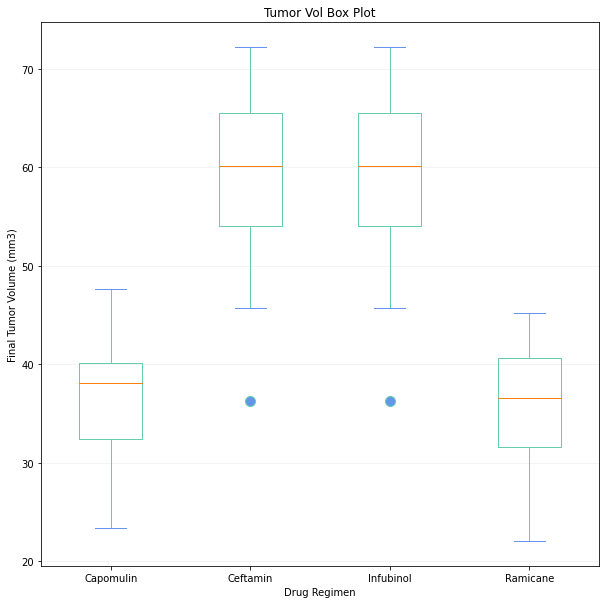

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin = Capomulin_tumor_vol
ceftamin = Ceftamin_tumor_vol
infubinol = Infubinol_tumor_vol
ramicane = Ramicane_tumor_vol
#set labels and gridlines
fig1, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_title('Tumor Vol Box Plot')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
ax.set_xticklabels(['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'])
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.3)
#colors
boxprops=dict(color='mediumaquamarine')
capprops=dict(color='cornflowerblue')
whiskerprops=dict(color='mediumaquamarine')
flierprops = dict(marker='o', markerfacecolor='cornflowerblue', markersize=10,linestyle='none', markeredgecolor='mediumaquamarine')
#create box plot
data = [capomulin, ceftamin, infubinol, ramicane]
ax.boxplot(data,flierprops=flierprops, boxprops=boxprops,whiskerprops=whiskerprops,capprops=capprops)
plt.show()

## Line and Scatter Plots

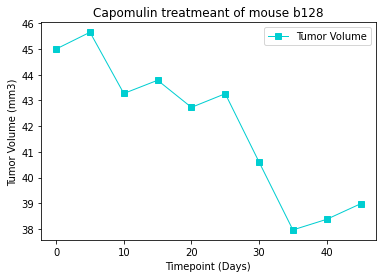

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
lineplot_df=drop_dup_mouse_df.loc[drop_dup_mouse_df["Mouse ID"]=="b128"]
x_axis=lineplot_df["Timepoint"]
y_axis=lineplot_df["Tumor Volume (mm3)"]
line = plt.plot(x_axis, y_axis, marker="s", color="darkturquoise", linewidth=1, label="Tumor Volume")
plt.legend(loc="best")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatmeant of mouse b128')
plt.show()

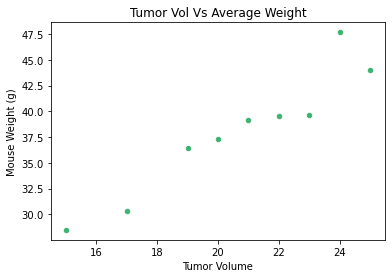

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#weight_vs_tumorvol=best_treatments.loc[best_treatments["Drug Regimen"]=="Capomulin"]
weight_df=Capomulin_df.groupby('Weight (g)')
#drop_dup_mouse_df
avg_tumor=weight_df['Tumor Volume (mm3)'].mean()
weight_vs_tumor=pd.DataFrame(avg_tumor).reset_index()
weight_vs_tumor
scatter=weight_vs_tumor.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)',marker="o", color="mediumseagreen")
plt.xlabel('Tumor Volume')
plt.ylabel('Mouse Weight (g)')
plt.title('Tumor Vol Vs Average Weight')
plt.show()                 


## Correlation and Regression

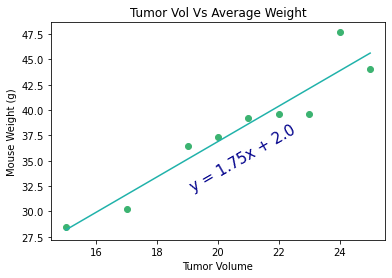

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_vs_tumor['Weight (g)']
y_values = weight_vs_tumor['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot scatter and regression line
plt.scatter(x_values,y_values, color= "mediumseagreen")
plt.plot(x_values,regress_values,"lightseagreen")
plt.annotate(line_eq,(19,32),fontsize=15,color="darkblue",rotation = "30")
plt.xlabel('Tumor Volume')
plt.ylabel('Mouse Weight (g)')
plt.title('Tumor Vol Vs Average Weight')
plt.show()

In [19]:
#correlation
correlation=x_values.corr(y_values)
correlation

0.9503881112220832